In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [0]:
# 1. 데이터셋 생성하기

width = 28
height = 28

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width * height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width * height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width * height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 127us/step - loss: 0.6788 - accuracy: 0.8212 - val_loss: 0.2881 - val_accuracy: 0.9197
Epoch 2/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.2763 - accuracy: 0.9201 - val_loss: 0.2282 - val_accuracy: 0.9340
Epoch 3/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.2198 - accuracy: 0.9365 - val_loss: 0.1841 - val_accuracy: 0.9495
Epoch 4/30
50000/50000 [==============================] - 4s 89us/step - loss: 0.1830 - accuracy: 0.9463 - val_loss: 0.1604 - val_accuracy: 0.9551
Epoch 5/30
50000/50000 [==============================] - 4s 86us/step - loss: 0.1563 - accuracy: 0.9544 - val_loss: 0.1524 - val_accuracy: 0.9564
Epoch 6/30
50000/50000 [==============================] - 4s 86us/step - loss: 0.1360 - accuracy: 0.9602 - val_loss: 0.1379 - val_accuracy: 0.9603
Epoch 7/30
50000/50000 [==============================] - 5s 93us/s

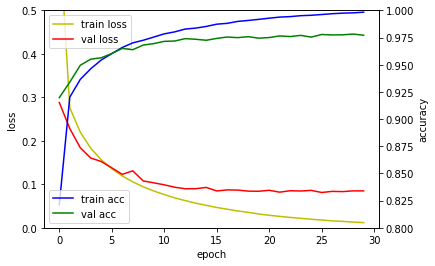

In [10]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [11]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 1s 51us/step
## evaluation loss and metrics ##
[0.07737949834896135, 0.9768000245094299]


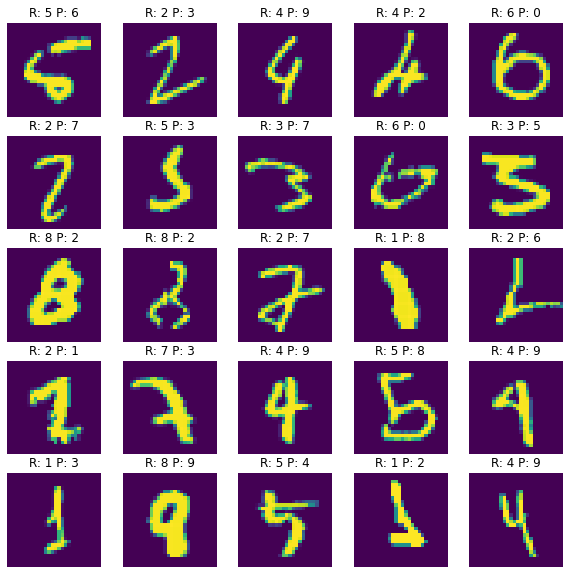

In [12]:
# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row * plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1
    cnt += 1

plt.show()